#Time Series Forecasting using BSTS

BSTS: Bayeasian Structural Time Series.


## Objetivo

* Reproduzir exemplo disponibilizado em: https://github.com/wwrechard/pydlm
* Utilizar a library do Python **pydlm**.

## Referências

* https://github.com/wwrechard/pydlm

## Setup

In [0]:
!pip install numpy
!pip install seaborn
!pip install -U -q PyDrive
!pip install pydlm

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pydlm.plot.dlmPlot as dlmPlot

## Configuração Google Drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autentica e cria um cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

print('Authenticated')

Authenticated


In [0]:
df = drive.CreateFile({'id': '1jpfm5ehf0AxcxZFLb5bPuWPs0EIytdLj'})
df.GetContentFile('data.csv')
df = pd.read_csv("data.csv", low_memory=False)

In [0]:
time_series = list(df['iclaimsNSA'])

# Plot the raw data

dlmPlot.plotData(range(len(time_series)),
                 time_series,
                 showDataPoint=False,
                 label='raw_data')
plt.legend(loc='best', shadow=True)
plt.show()

In [0]:
features = []
for i in range(0, len(df)):
  features.append(list(df.iloc[i, 1:]))
  

  
len(features)

In [0]:
# Build a simple model
from pydlm import dlm, trend, seasonality

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


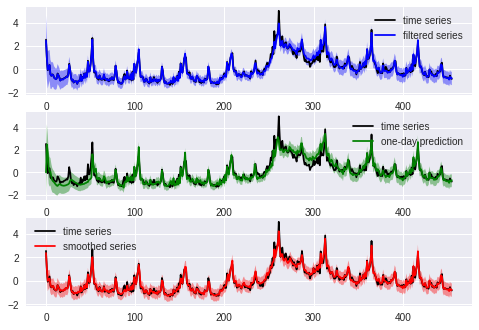

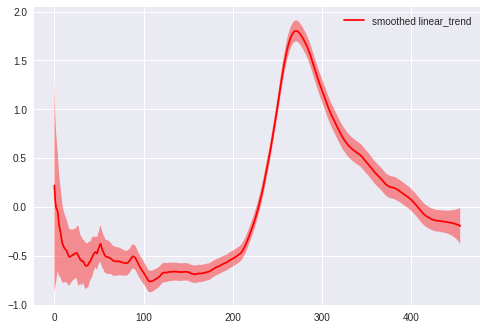

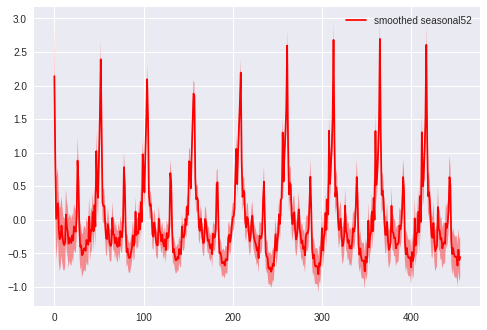

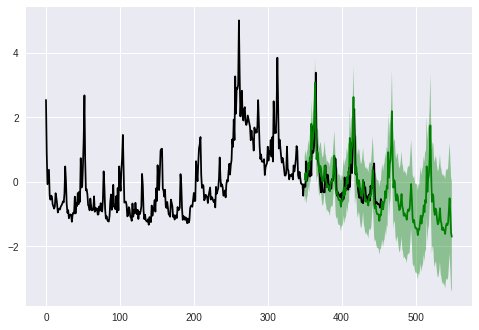

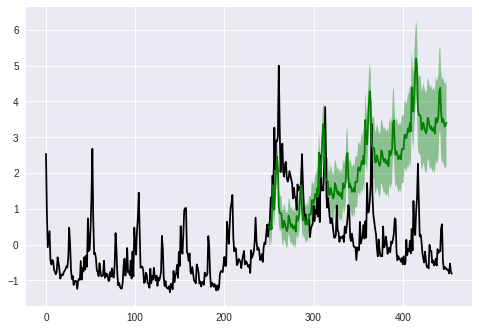

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


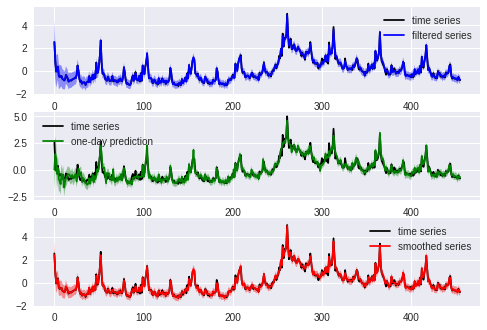

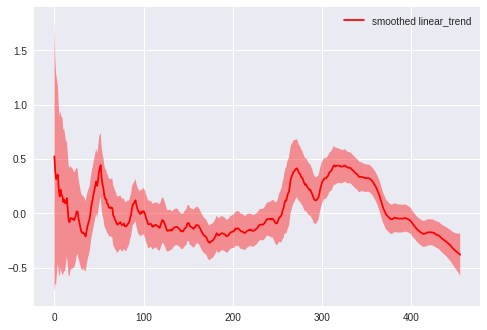

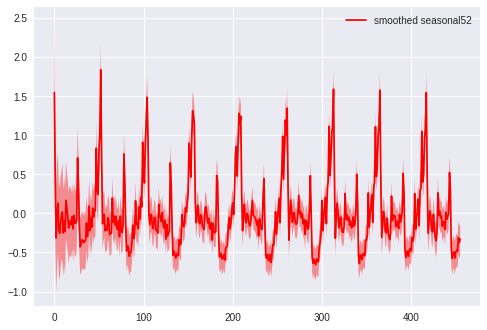

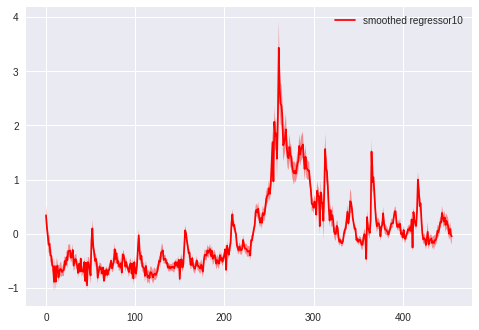

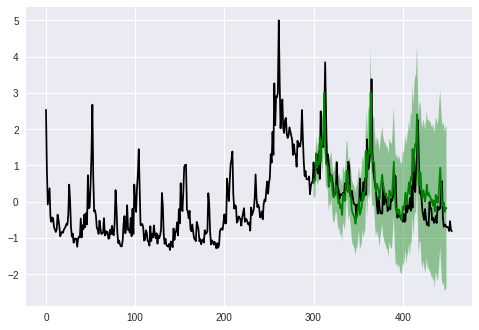

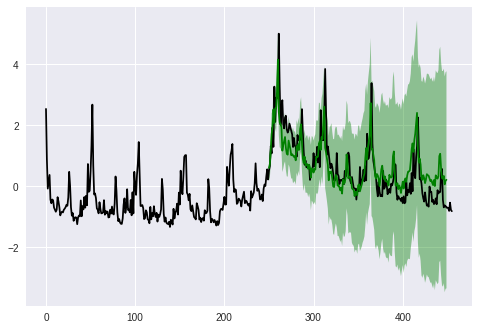

In [94]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)

simple_dlm = dlm(time_series) + linear_trend + seasonal52
simple_dlm.fit()

# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()
# Plot each component (attribution)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')
# Plot the prediction give the first 350 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(N=200, date=350)
# Plot the prediction give the first 250 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(N=200, date=250)

# Build a dynamic regression model
from pydlm import dynamic
regressor10 = dynamic(features=features, discount=1.0, name='regressor10', w=10)
drm = dlm(time_series) + linear_trend + seasonal52 + regressor10
drm.fit()

# Plot the fitted results
drm.turnOff('data points')
drm.plot()
# Plot each component (attribution)
drm.turnOff('predict plot')
drm.turnOff('filtered plot')
drm.plot('linear_trend')
drm.plot('seasonal52')
drm.plot('regressor10')
# Plot the prediction give the first 300 weeks and forcast the next 150 weeks.
drm.plotPredictN(N=150, date=300)
# Plot the prediction give the first 250 weeks and forcast the next 200 weeks.
drm.plotPredictN(N=200, date=250)